# GSM-EVP: elasto-visco-plasticity with isotropic hardening


In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import sympy as sp
import numpy as np
from IPython.display import display, Math, Markdown
from bmcs_matmod.api import GSM1D_EVP
gsm = GSM1D_EVP()
display(Markdown(gsm.latex_potentials()))

## class GSM1D_EVP
### Helmholtz free energy
$$F = \frac{E \left(\varepsilon - \varepsilon^\mathrm{p}\right)^{2}}{2} + \frac{K z^{2}}{2}$$
$$\left\{ Z : K z, \  \sigma^\mathrm{p} : - E \left(- \varepsilon + \varepsilon^\mathrm{p}\right)\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = - Z \dot{z} + \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}}$$
#### Lagrangian
$$\mathcal{L} = Z \dot{z} - \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}} - \lambda_{\mathrm{\phi}} \left(Z + \eta_\mathrm{vp} \left|{\dot{\varepsilon^\mathrm{p}}}\right| + f_\mathrm{c} - \left|{\sigma^\mathrm{p}}\right|\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{p}} + \lambda_{\mathrm{\phi}} \operatorname{sign}{\left(\sigma^\mathrm{p} \right)}\\\dot{z} - \lambda_{\mathrm{\phi}}\\- Z - \eta_\mathrm{vp} \left|{\dot{\varepsilon^\mathrm{p}}}\right| - f_\mathrm{c} + \left|{\sigma^\mathrm{p}}\right|\end{matrix}\right] = 0$$
### Legendre transform
#### Strain substitutions in dissipative terms
$$\left\{ \varepsilon : \varepsilon^\mathrm{p} + \frac{\sigma}{E}\right\}$$
$$\left\{ \dot{\varepsilon} : \dot{\varepsilon^\mathrm{p}} + \frac{\dot{\sigma}}{E}\right\}$$
### Gibbs free energy
$$G = \sigma \varepsilon- \left[\frac{E \left(\varepsilon - \varepsilon^\mathrm{p}\right)^{2}}{2} + \frac{K z^{2}}{2}\right] $$
#### Gibbs free energy after strain substitutions
$$G = - \frac{K z^{2}}{2} + \sigma \varepsilon^\mathrm{p} + \frac{\sigma^{2}}{2 E}$$
$$\left\{ Z : K z, \  \sigma^\mathrm{p} : \sigma\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = - Z \dot{z} + \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}}$$
#### Lagrangian
$$\mathcal{L} = Z \dot{z} - \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}} - \lambda_{\mathrm{\phi}} \left(Z + \eta_\mathrm{vp} \left|{\dot{\varepsilon^\mathrm{p}}}\right| + f_\mathrm{c} - \left|{\sigma^\mathrm{p}}\right|\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{p}} + \lambda_{\mathrm{\phi}} \operatorname{sign}{\left(\sigma^\mathrm{p} \right)}\\\dot{z} - \lambda_{\mathrm{\phi}}\\- Z - \eta_\mathrm{vp} \left|{\dot{\varepsilon^\mathrm{p}}}\right| - f_\mathrm{c} + \left|{\sigma^\mathrm{p}}\right|\end{matrix}\right] = 0$$

## Linear strain-driven loading

In [91]:
E_val = 30e+3  # Young's modulus in MPa
K_val = 1e+3  # Bulk modulus in MPa
f_c_val = 30 # Strength in MPa
eva_vp_val = 10e+4  # Viscosity in MPa s
mparams = dict(E=E_val, K=K_val, f_c=f_c_val, eta_vp=eva_vp_val)

f_time = 10  # Final time in secondsfinal_time = 1
n_t = 151
t_t = np.linspace(0, f_time, n_t)
eps_max = 0.0025
eps_n_t = np.linspace(0, eps_max, n_t)

response = gsm.get_response(eps_n_t, t_t, **mparams)
t_t_ec, eps_ta_ec, sig_ta_ec, Eps_t_ec, Sig_t_ec, iter_t_ec, lam_t_ec, (d_t_t_ec, d_eps_ta_ec) = response
eps_t_ec = eps_ta_ec[:, 0]
sig_t_ec = sig_ta_ec[:, 0, 0]
# use the stress history to reproduce the response using stress control
response = gsm.get_G_response(sig_t_ec, t_t, **mparams)
t_t_sc, eps_ta_sc, sig_ta_sc, Eps_t_sc, Sig_t_sc, iter_t_sc, lam_t_sc, (d_t_t_sc, d_eps_ta_sc) = response
iter_t = iter_t_sc[:, 0]
eps_t_sc = eps_ta_sc[:, 0, 0]
sig_t_sc = sig_ta_sc[:, 0]
eps_t_ec.shape, sig_t_ec.shape, eps_t_sc.shape, sig_t_sc.shape

In [92]:
eps_ve_t_ec, z_ve_t_ec = Eps_t_ec[:, 0, :].T
sig_ve_t_ec, Z_ve_t_ec = Sig_t_ec[:, 0, :].T
eps_ve_t_sc, z_ve_t_sc = Eps_t_sc[:, 0, :].T
sig_ve_t_sc, Z_ve_t_sc = Sig_t_sc[:, 0, :].T
sig_ve_t_ec.shape, eps_ve_t_ec.shape, sig_ve_t_sc.shape, eps_ve_t_sc.shape

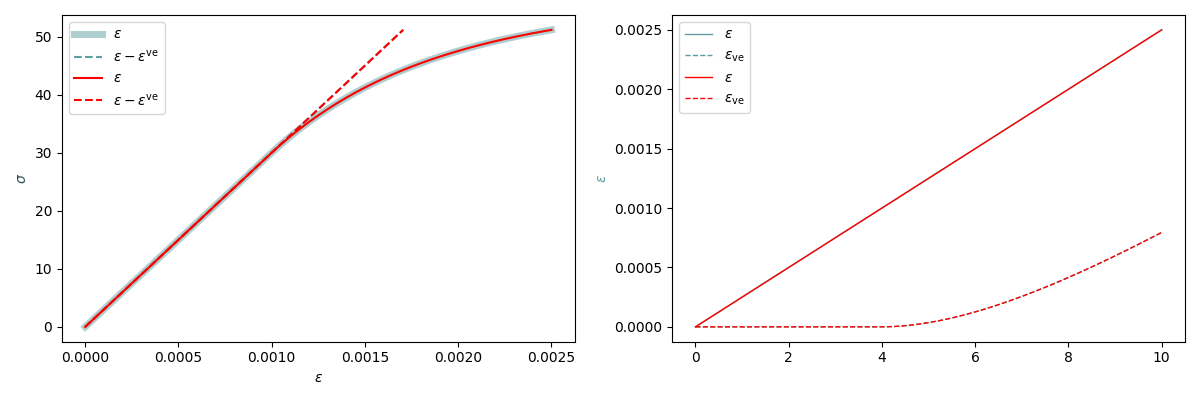

In [93]:
fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 4))

ax_sig.plot(eps_t_ec, sig_t_ec, color='cadetblue', lw=5, label=r'$\varepsilon$', alpha=0.5)
ax_sig.plot(eps_t_ec - eps_ve_t_ec, sig_t_ec, ls='dashed', color='cadetblue', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')

ax_sig.plot(eps_t_sc, sig_t_sc, color='red', label=r'$\varepsilon$')
ax_sig.plot(eps_t_sc - eps_ve_t_sc, sig_t_sc, ls='dashed', color='red', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')

ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

ax_eps.plot(t_t_ec, eps_t_ec, label=r'$\varepsilon$', color='cadetblue', lw=1)
ax_eps.plot(t_t_ec, eps_ve_t_ec, label=r'$\varepsilon_\mathrm{ve}$', color='cadetblue', ls='dashed', lw=1)

ax_eps.plot(t_t_sc, eps_t_sc, label=r'$\varepsilon$', color='red', lw=1)
ax_eps.plot(t_t_sc, eps_ve_t_sc, label=r'$\varepsilon_\mathrm{ve}$', color='red', ls='dashed', lw=1)
ax_eps.legend()
ax_eps.set_ylabel(r'$\varepsilon$', color='cadetblue')

plt.tight_layout()
plt.show()

In [94]:
response = gsm.get_response(eps_n_t, t_t, **mparams)
t_t, eps_ta, sig_ta, Eps_t, Sig_t, iter_t, lam_t, (d_t_t, d_eps_ta) = response
eps_t = eps_ta[:, 0]
eps_p_t, z_t = Eps_t[:, 0, :].T
sig_t, Z_t = Sig_t[:, 0, :].T

Text(0, 0.5, '$\\omega$')

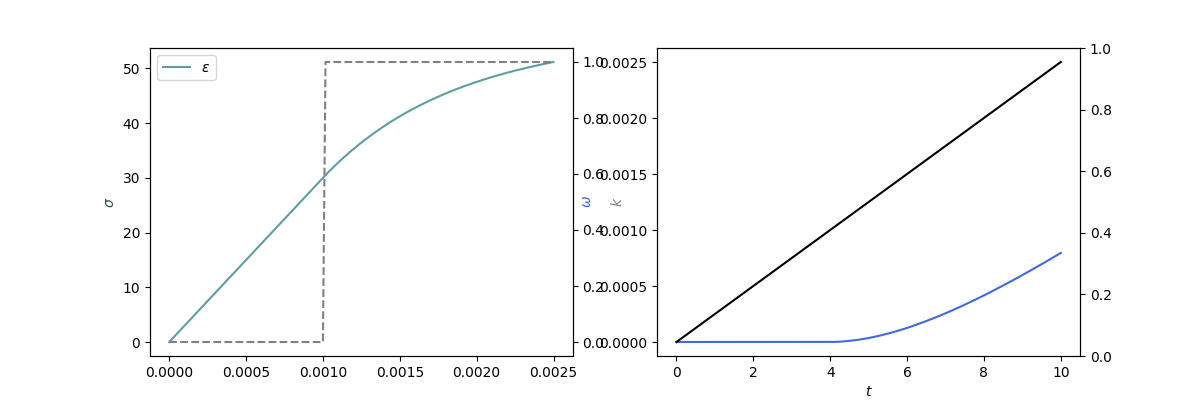

In [95]:
%matplotlib widget
fig, (ax_sig, ax_omega) = plt.subplots(1, 2, figsize=(12, 4))

# Plot stress-strain and iterations-strain curves
ax_iter = ax_sig.twinx()
ax_eps_v = ax_omega.twinx()

ax_sig.plot(eps_t, sig_t, color='cadetblue', label=r'$\varepsilon$')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.legend()

ax_iter.plot(eps_t, iter_t, ls='dashed', color='gray')
ax_iter.set_ylabel(r'$k$', color='gray')

ax_omega.plot(t_t, eps_p_t, label='strain', color='royalblue')
ax_omega.plot(t_t, eps_t, label='strain', color='black')

ax_omega.set_xlabel(r'$t$')
ax_omega.set_ylabel(r'$\omega$', color='royalblue')
